# 📊 Telco Churn Predictor — Explainable AI Dashboard

## 🎯 Project Objective
Develop a machine learning-based system that predicts which customers are likely to leave a business (churn) and provides interpretable insights into the key factors driving their decisions.

## 🚀 Business Impact
This enables managers to take data-driven retention actions including:

- 🎁 Personalized offers
- 💰 Targeted discounts
- 📈 Strategic engagement campaigns

## 🔍 Key Features

| Component | Description |
|-----------|-------------|
| Predictive Analytics | Identifies at-risk customers before they churn |
| Explainable AI | Provides clear insights into churn drivers |
| Actionable Insights | Recommends specific retention strategies |

> **Business Value:** Transform customer retention from reactive to proactive through AI-powered decision intelligence.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LinearRegression,LogisticRegression)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from lime import lime_tabular


data=pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.head())
print(data.info())
print(data.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [89]:
data=data.drop_duplicates()
customer_ids = data["customerID"]
data.drop("customerID", axis=1, inplace=True)

print(data.head())
print(data.info())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [90]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors='coerce')
print(data["TotalCharges"].isnull().sum()) # np.int64(11)
data["TotalCharges"].fillna(data["TotalCharges"].median(),inplace=True)

11


C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_20340\2392673830.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].median(),inplace=True)


In [91]:
for col in data.columns:
    if data[col].dtype == 'O':  # if column is text/categorical
        data[col].fillna(data[col].mode()[0],inplace=True)
    else:
        data[col].fillna(data[col].median(),inplace=True)

C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_20340\2184980985.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0],inplace=True)
C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_20340\2184980985.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [92]:
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [93]:
data.replace({'Yes':1,'No':0},inplace=True)
print(data.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  Female              0        1           0       1             0   
1    Male              0        0           0      34             1   
2    Male              0        0           0       2             1   
3    Male              0        0           0      45             0   
4  Female              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL              0            1   
1                 0             DSL              1            0   
2                 0             DSL              1            1   
3  No phone service             DSL              1            0   
4                 0     Fiber optic              0            0   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                0           0           0               0  Month-to-month   
1             

C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_20340\4178883478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Yes':1,'No':0},inplace=True)


In [94]:
data=pd.get_dummies(data,drop_first=True)
print(data.head())

   SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  \
0              0        1           0       1             0                 1   
1              0        0           0      34             1                 0   
2              0        0           0       2             1                 1   
3              0        0           0      45             0                 0   
4              0        0           0       2             1                 1   

   MonthlyCharges  TotalCharges  Churn  gender_Male  ...  \
0           29.85         29.85      0        False  ...   
1           56.95       1889.50      0         True  ...   
2           53.85        108.15      1         True  ...   
3           42.30       1840.75      0         True  ...   
4           70.70        151.65      1        False  ...   

   TechSupport_No internet service  StreamingTV_1  \
0                            False          False   
1                            False          Fa

## ✅ Data Cleaning Steps Applied

- **Removed Unwanted Columns** - Dropped irrelevant columns from dataset
- **Data Type Conversion** - Changed specific columns from object (string) to numeric type
- **Missing Value Treatment** - Filled all missing values appropriately
- **Binary Encoding** - Replaced all "Yes"/"No" values with 1/0

## 📊 Current Data Status
| Step | Status |
|------|--------|
| Column Cleaning | ✅ Completed |
| Data Type Conversion | ✅ Completed |
| Missing Values | ✅ Completed |
| Binary Encoding | ✅ Completed |

> **Data is now ready for feature engineering and model training**

In [95]:
print(data.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_1', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_1', 'OnlineSecurity_No internet service',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_1', 'DeviceProtection_No internet service',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_1',
       'StreamingTV_No internet service', 'StreamingMovies_1',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [96]:
x=data.drop('Churn',axis=1);
y=data['Churn']
# Ensure all lengths match
assert len(x) == len(y) == len(customer_ids), "Length mismatch between x, y, or customer_ids"

# Split everything together
x_train, x_test, y_train, y_test, id_train, id_test = train_test_split(
    x, y, customer_ids, test_size=0.2, random_state=42
)

# XGBoost vs Random Forest

**Random Forest:** Builds trees independently in parallel

**XGBoost:** Builds trees sequentially to correct prior errors → often better performance and explainability

**Plus:** XGBoost has built-in regularization, prevents overfitting, great for tabular datasets like Telco Churn

In [97]:
model=XGBClassifier(
    n_estimators=300,       # number of trees
    learning_rate=0.05,     # smaller = slower but better
    max_depth=5,            # tree depth
    subsample=0.8,          # randomly sample rows
    colsample_bytree=0.8,   # randomly sample columns
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1] # chances to stay
print(y_pred)
print(y_prob)

C:\Users\DAKSH LAKHI\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [09:56:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[1 0 0 ... 0 0 1]
[0.76753753 0.08947051 0.02873548 ... 0.03499337 0.00429318 0.6009893 ]


In [98]:
# model performance:

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

# Classification report
print("\nClassification Report:\n",classification_report(y_test,y_pred))

# ROC-AUC score
print("\nROC-AUC Score: ",roc_auc_score(y_test,y_pred))

Confusion Matrix:
 [[930 106]
 [176 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


ROC-AUC Score:  0.7129167658658275


In [99]:
type(model)


xgboost.sklearn.XGBClassifier

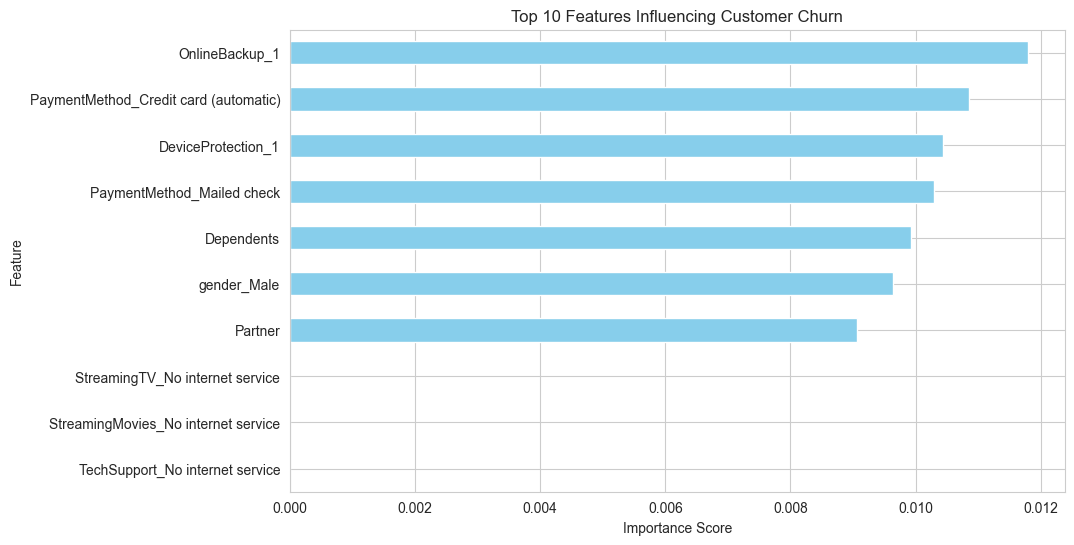

In [100]:
# Get feature importances from model
importances = model.feature_importances_
feat_imp=pd.Series(importances,index=x_train.columns).sort_values(ascending=True)
plt.figure(figsize = (10,6))
feat_imp[:10].plot(kind='barh',color='skyblue')
plt.title("Top 10 Features Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [101]:
explainer=lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['Not Churn','Churn'],
    mode="classification"
)

📊 Customer Churn Prediction Results:
-----------------------------------
Prediction: Not Churn
Churn Probability: 0.03


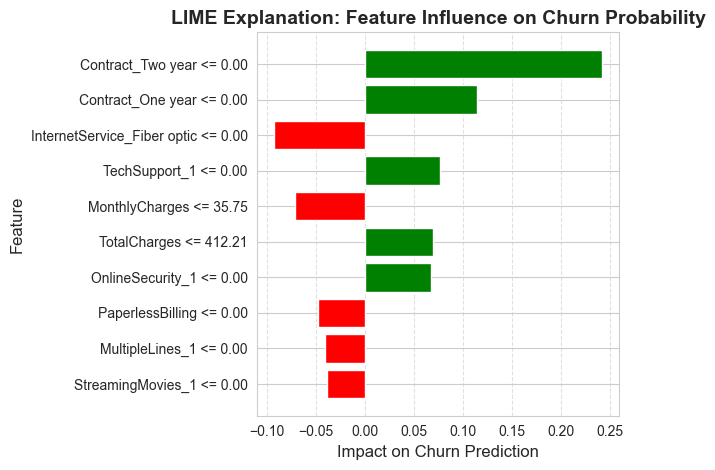

In [102]:
i=50
customer=x_test.iloc[[i]]
# Make prediction
prediction = model.predict(customer)[0]
probability = model.predict_proba(customer)[0][1]

# Print results clearly
print("📊 Customer Churn Prediction Results:")
print("-----------------------------------")
print(f"Prediction: {'Churn' if prediction == 1 else 'Not Churn'}")
print(f"Churn Probability: {probability:.2f}")

exp=explainer.explain_instance(
    data_row=customer.values[0],
    predict_fn=model.predict_proba
)
fig = exp.as_pyplot_figure(label=1)
plt.title("LIME Explanation: Feature Influence on Churn Probability", fontsize=14, fontweight='bold')
plt.xlabel("Impact on Churn Prediction", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [103]:
import joblib

# Save model
joblib.dump(model, "model.pkl")
print("✅ Model saved successfully as model.pkl")

x_train.to_csv("x_train.csv", index=False)
x_test.to_csv("x_test.csv", index=False)
id_test.to_csv("id_test.csv", index=False)

✅ Model saved successfully as model.pkl
